In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
import seaborn as sns

sns.set_theme(style="darkgrid")
%load_ext lab_black

## Importing data

Dev data: 1500 wav (mono, 8kHz) files (150 recordings for each digit)

`<ID>_<Label>.wav`

In [2]:
from pydub import AudioSegment
from librosa.feature import mfcc


def get_dev_X_y():
    import os

    DATASET_DIR = "../datasets/free-spoken-digit/dev/"
    filenames_ys = [
        (filename, filename.split(".")[0].split("_")[1])
        for filename in os.listdir(DATASET_DIR)
    ]
    X_audiofiles = [
        AudioSegment.from_file(DATASET_DIR + filename) for filename, _ in filenames_ys
    ]
    y = [y for _, y in filenames_ys]

    return X_audiofiles, np.array(y)


def normalize_volume_and_strip_silence(X_audiofiles):
    def set_loudness(sound, target_dBFS):
        loudness_difference = target_dBFS - sound.dBFS
        return sound.apply_gain(loudness_difference)

    X_audiofiles = [
        set_loudness(x.strip_silence().normalize(), -20) for x in X_audiofiles
    ]
    return X_audiofiles


def convert_to_numpy(X_audiofiles):
    # Convert audio samples to numpy arrays
    X = [
        np.array(audio_file.get_array_of_samples(), dtype=float)[:7000]
        for audio_file in X_audiofiles
    ]

    return X


def pad(X):
    return np.array([np.pad(x, (0, 7000 - len(x))) for x in X])


X_audiofiles, y = get_dev_X_y()
X = pad(convert_to_numpy(normalize_volume_and_strip_silence(X_audiofiles)))

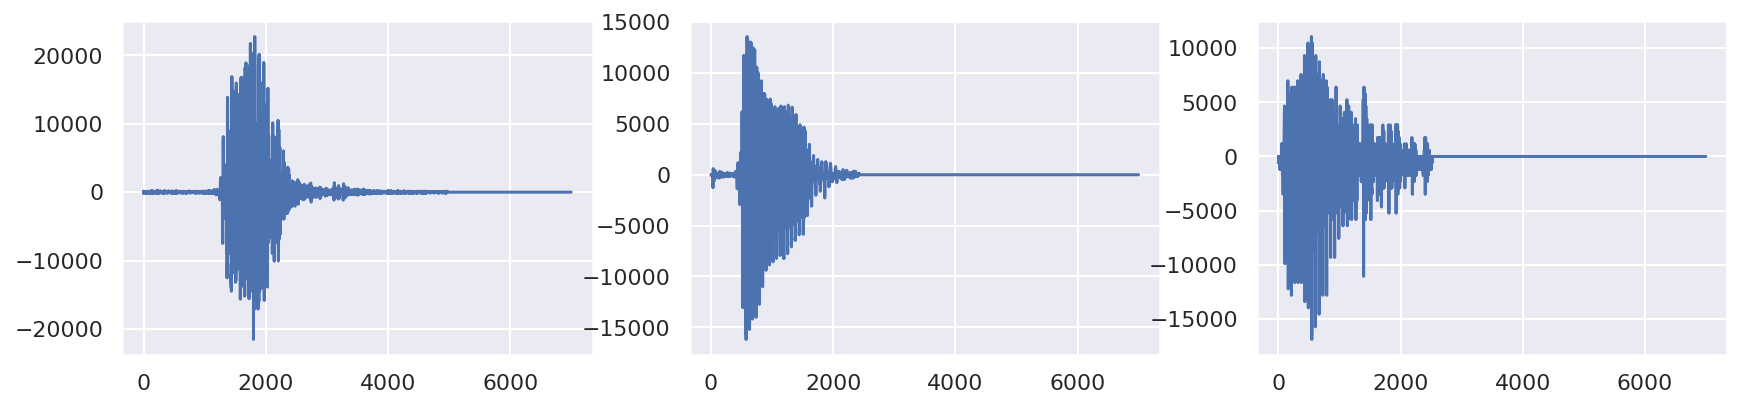

In [3]:
_, axes = plt.subplots(1, 3, figsize=(12, 3))
plt.tight_layout()
i = 1000
for ax in axes.ravel():
    ax.plot(X[i])
    i += 1

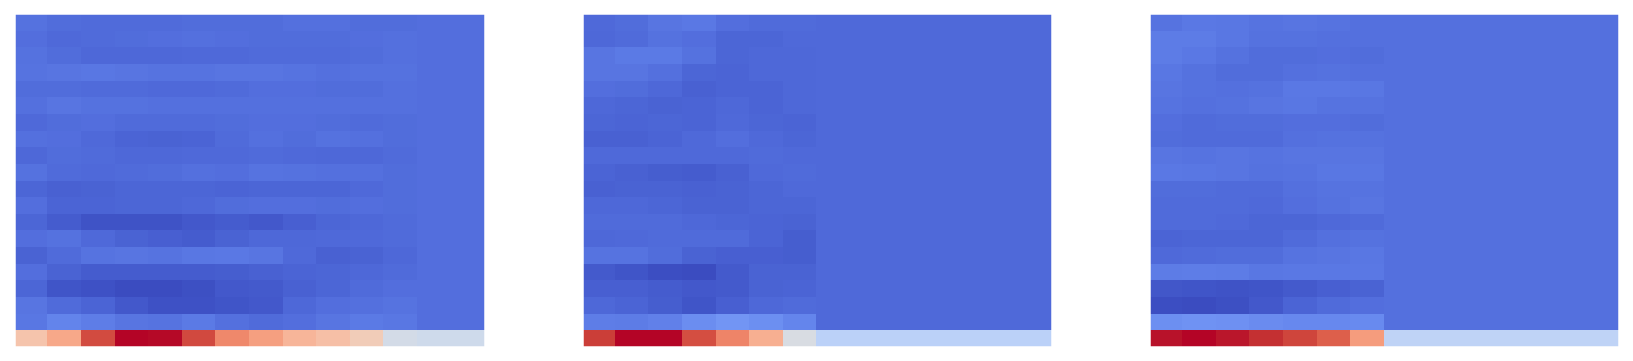

In [4]:
from librosa.display import specshow
from librosa.feature import mfcc

_, axes = plt.subplots(1, 3, figsize=(12, 3))
plt.tight_layout()
i = 1000
for ax in axes.ravel():
    specshow(mfcc(y=X[i]), ax=ax)
    i += 1

In [5]:
X = np.array([mfcc(y=x).reshape(-1) for x in X])

In [6]:
X.shape

(1500, 280)

In [7]:
y.shape

(1500,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.976

## Eval set

In [10]:
def get_eval_X():
    import os

    DATASET_DIR = "../datasets/free-spoken-digit/eval/"
    X_audiofiles = [
        AudioSegment.from_file(DATASET_DIR + file)
        for file in sorted(
            os.listdir("../datasets/free-spoken-digit/eval/"),
            key=lambda f: int(f.split(".")[0]),
        )
    ]
    return X_audiofiles


X_eval = pad(convert_to_numpy(normalize_volume_and_strip_silence(get_eval_X())))
X_eval = np.array([mfcc(y=x).reshape(-1) for x in X_eval])

In [11]:
print(pd.DataFrame(clf.predict(X_eval), columns=["Predicted"]).to_csv())

,Predicted
0,3
1,9
2,2
3,9
4,3
5,9
6,6
7,1
8,5
9,8
10,3
11,4
12,1
13,0
14,8
15,6
16,4
17,6
18,4
19,0
20,3
21,7
22,4
23,1
24,3
25,7
26,8
27,4
28,1
29,7
30,6
31,1
32,5
33,8
34,9
35,0
36,1
37,0
38,5
39,0
40,7
41,3
42,7
43,6
44,8
45,0
46,0
47,7
48,0
49,7
50,3
51,0
52,2
53,0
54,0
55,5
56,0
57,8
58,7
59,2
60,3
61,7
62,3
63,3
64,7
65,5
66,9
67,0
68,1
69,2
70,2
71,6
72,5
73,2
74,4
75,5
76,8
77,1
78,6
79,8
80,7
81,7
82,1
83,6
84,1
85,4
86,0
87,1
88,1
89,2
90,4
91,3
92,7
93,3
94,7
95,2
96,7
97,4
98,9
99,1
100,9
101,4
102,7
103,5
104,6
105,2
106,3
107,1
108,6
109,5
110,3
111,9
112,3
113,1
114,8
115,1
116,5
117,9
118,1
119,6
120,4
121,9
122,8
123,8
124,4
125,3
126,8
127,0
128,5
129,2
130,7
131,2
132,3
133,9
134,3
135,8
136,2
137,0
138,5
139,2
140,2
141,8
142,1
143,4
144,3
145,2
146,9
147,6
148,8
149,0
150,0
151,6
152,8
153,6
154,7
155,7
156,5
157,5
158,7
159,9
160,5
161,4
162,8
163,3
164,7
165,7
166,2
167,0
168,9
169,1
170,6
171,9
172,5
173,0
174,2
175,8
176,3
177,2
178,8
179,4
180,9
181,0
182,5
1